In [82]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import pearsonr

import math
from statsmodels.graphics.gofplots import qqplot


In [46]:
df = pd.read_csv(r'C:\Users\I539797\Documents\Thesis\Datasets\Formatted Datasets\formatted_london.csv')
df.head()

,Date,NumericIndex,OriginMovementID,DestinationMovementID,MeanTravelTimeSeconds,RangeLowerBoundTravelTimeSeconds,RangeUpperBoundTravelTimeSeconds,DayOfWeek
0,2016-01-02,1092025,573,982,970,709,1325,Saturday
1,2016-01-02,1091680,573,318,1201,966,1492,Saturday
2,2016-01-02,1091681,573,319,1525,1141,2037,Saturday
3,2016-01-02,1091682,573,320,1116,824,1511,Saturday
4,2016-01-02,1091683,573,321,1075,853,1354,Saturday


In [29]:
# Print number of null items in each column
print(df.isnull().sum())

Date                                0
NumericIndex                        0
OriginMovementID                    0
DestinationMovementID               0
MeanTravelTimeSeconds               0
RangeLowerBoundTravelTimeSeconds    0
RangeUpperBoundTravelTimeSeconds    0
DayOfWeek                           0
dtype: int64


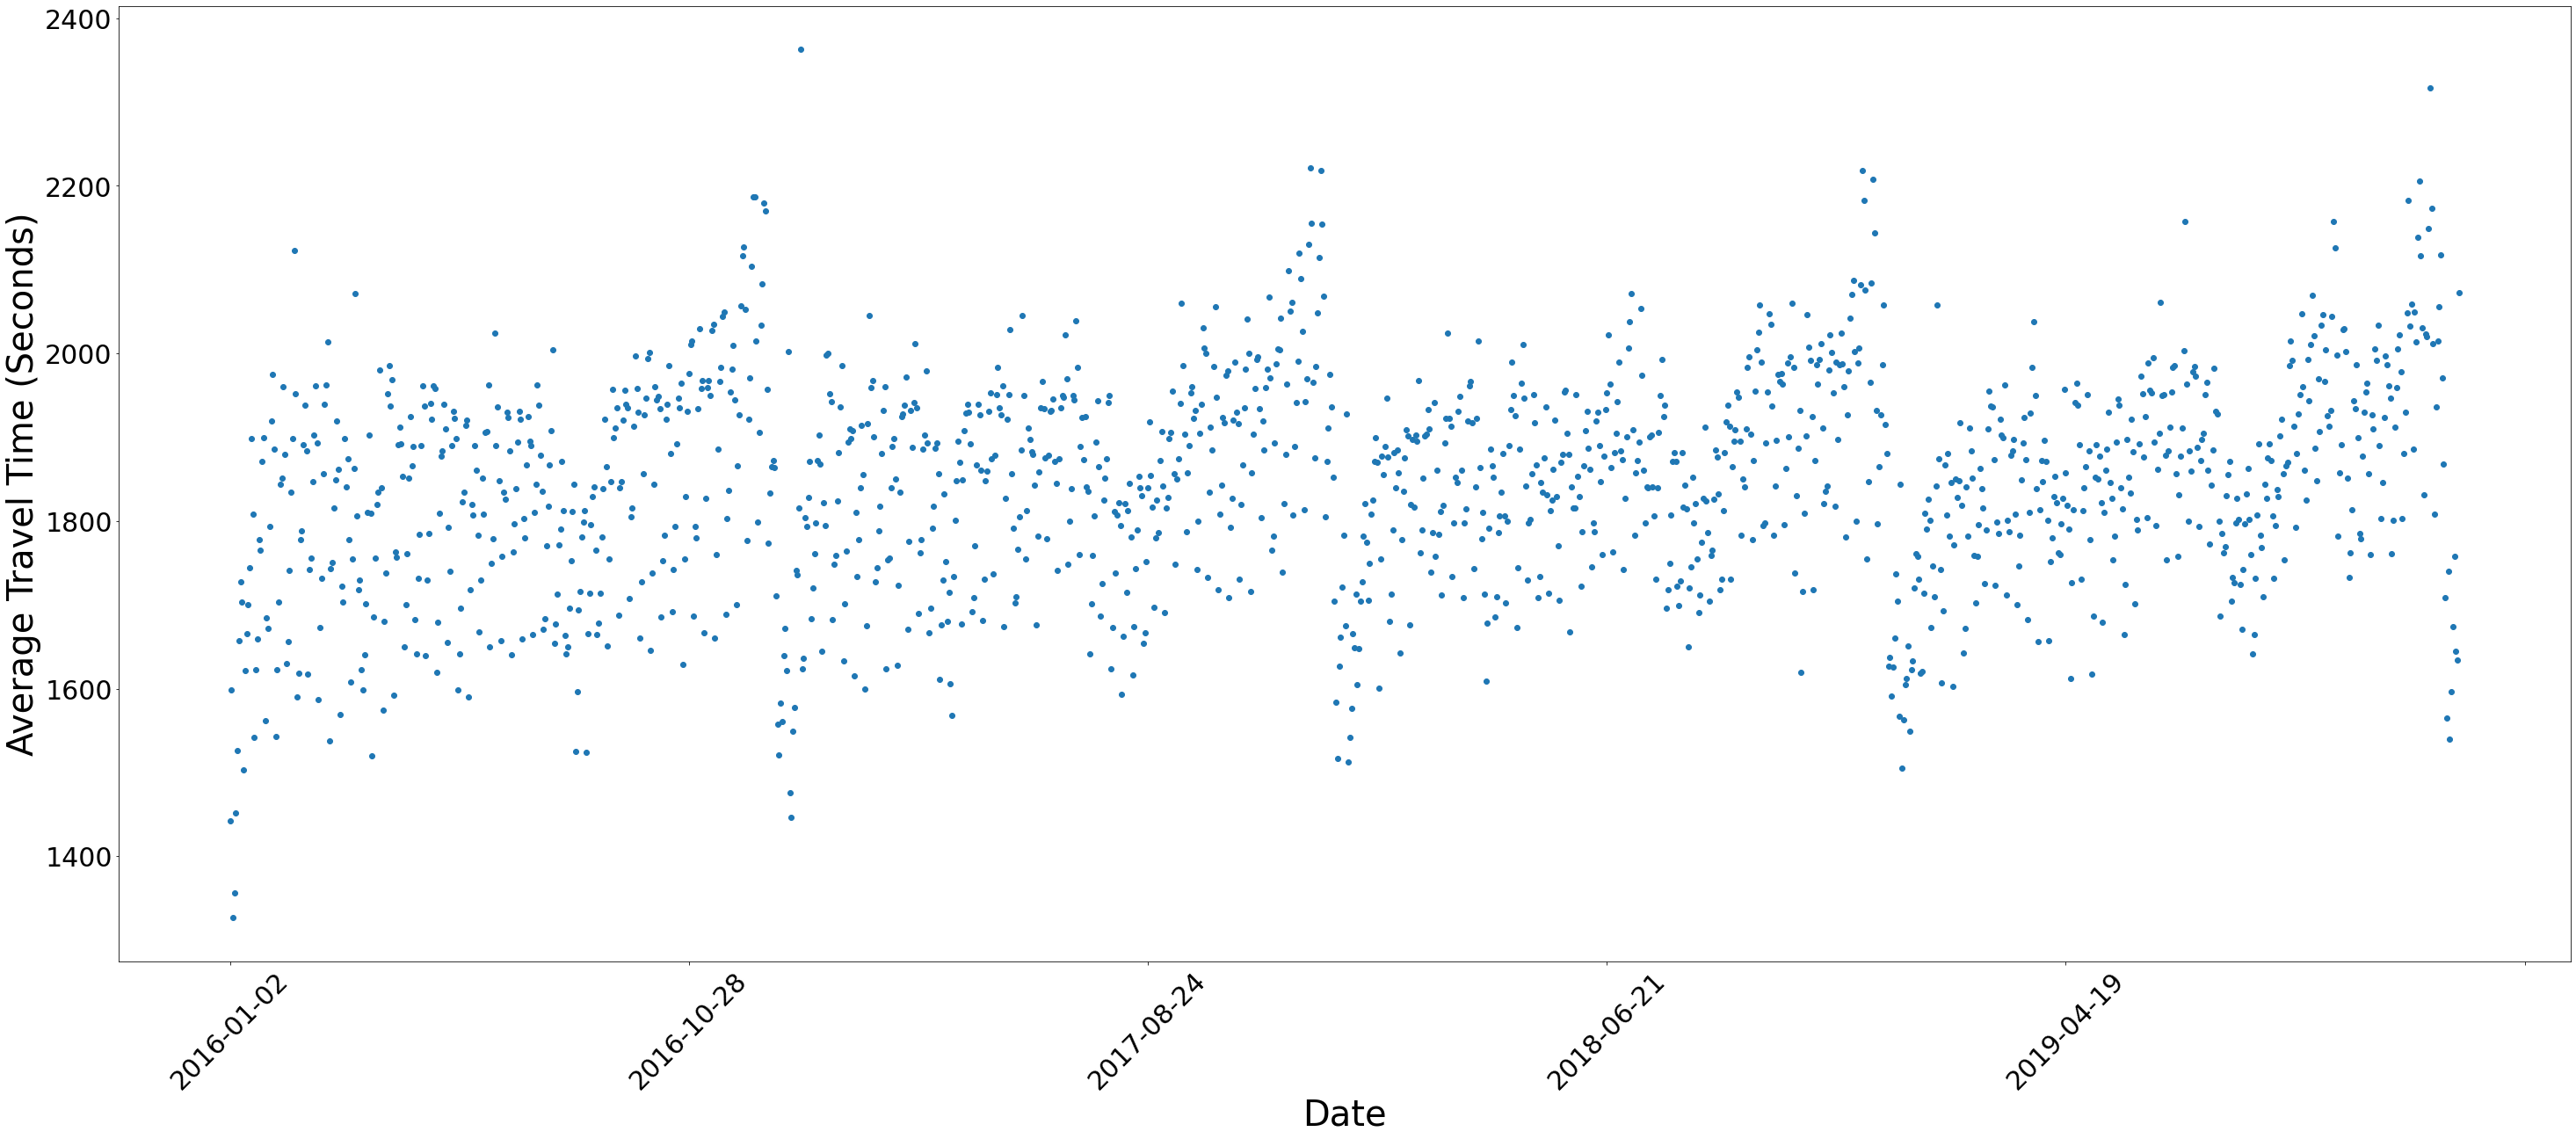

In [30]:
# Plot average travel time per date
avg_travel_times = df.groupby('Date')['MeanTravelTimeSeconds'].mean()[:-90]

fig, ax = plt.subplots(figsize=(50,20))
ax.scatter(df['Date'].unique()[:-90], avg_travel_times)

plt.xticks(fontsize=30, rotation=45)
plt.yticks(fontsize=30)
plt.xlabel("Date", fontsize=40)
plt.ylabel("Average Travel Time (Seconds)", fontsize=40)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.yaxis.set_major_locator(plt.MaxNLocator(7))

In [38]:
avg_travel_times.index

Index(['2016-01-02', '2016-01-03', '2016-01-04', '2016-01-05', '2016-01-06',
       '2016-01-07', '2016-01-08', '2016-01-09', '2016-01-10', '2016-01-11',
       ...
       '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27',
       '2019-12-28', '2019-12-29', '2019-12-30', '2019-12-31', '2020-01-01'],
      dtype='object', name='Date', length=1458)

In [48]:
df_avg_travel_times = pd.DataFrame(df.groupby('Date')['MeanTravelTimeSeconds'].mean()[:-90].reset_index())
df_avg_travel_times.head()

,Date,MeanTravelTimeSeconds
0,2016-01-02,1441.683897
1,2016-01-03,1597.951562
2,2016-01-04,1326.496403
3,2016-01-05,1355.872197
4,2016-01-06,1451.740286


ValueError: shape mismatch: objects cannot be broadcast to a single shape

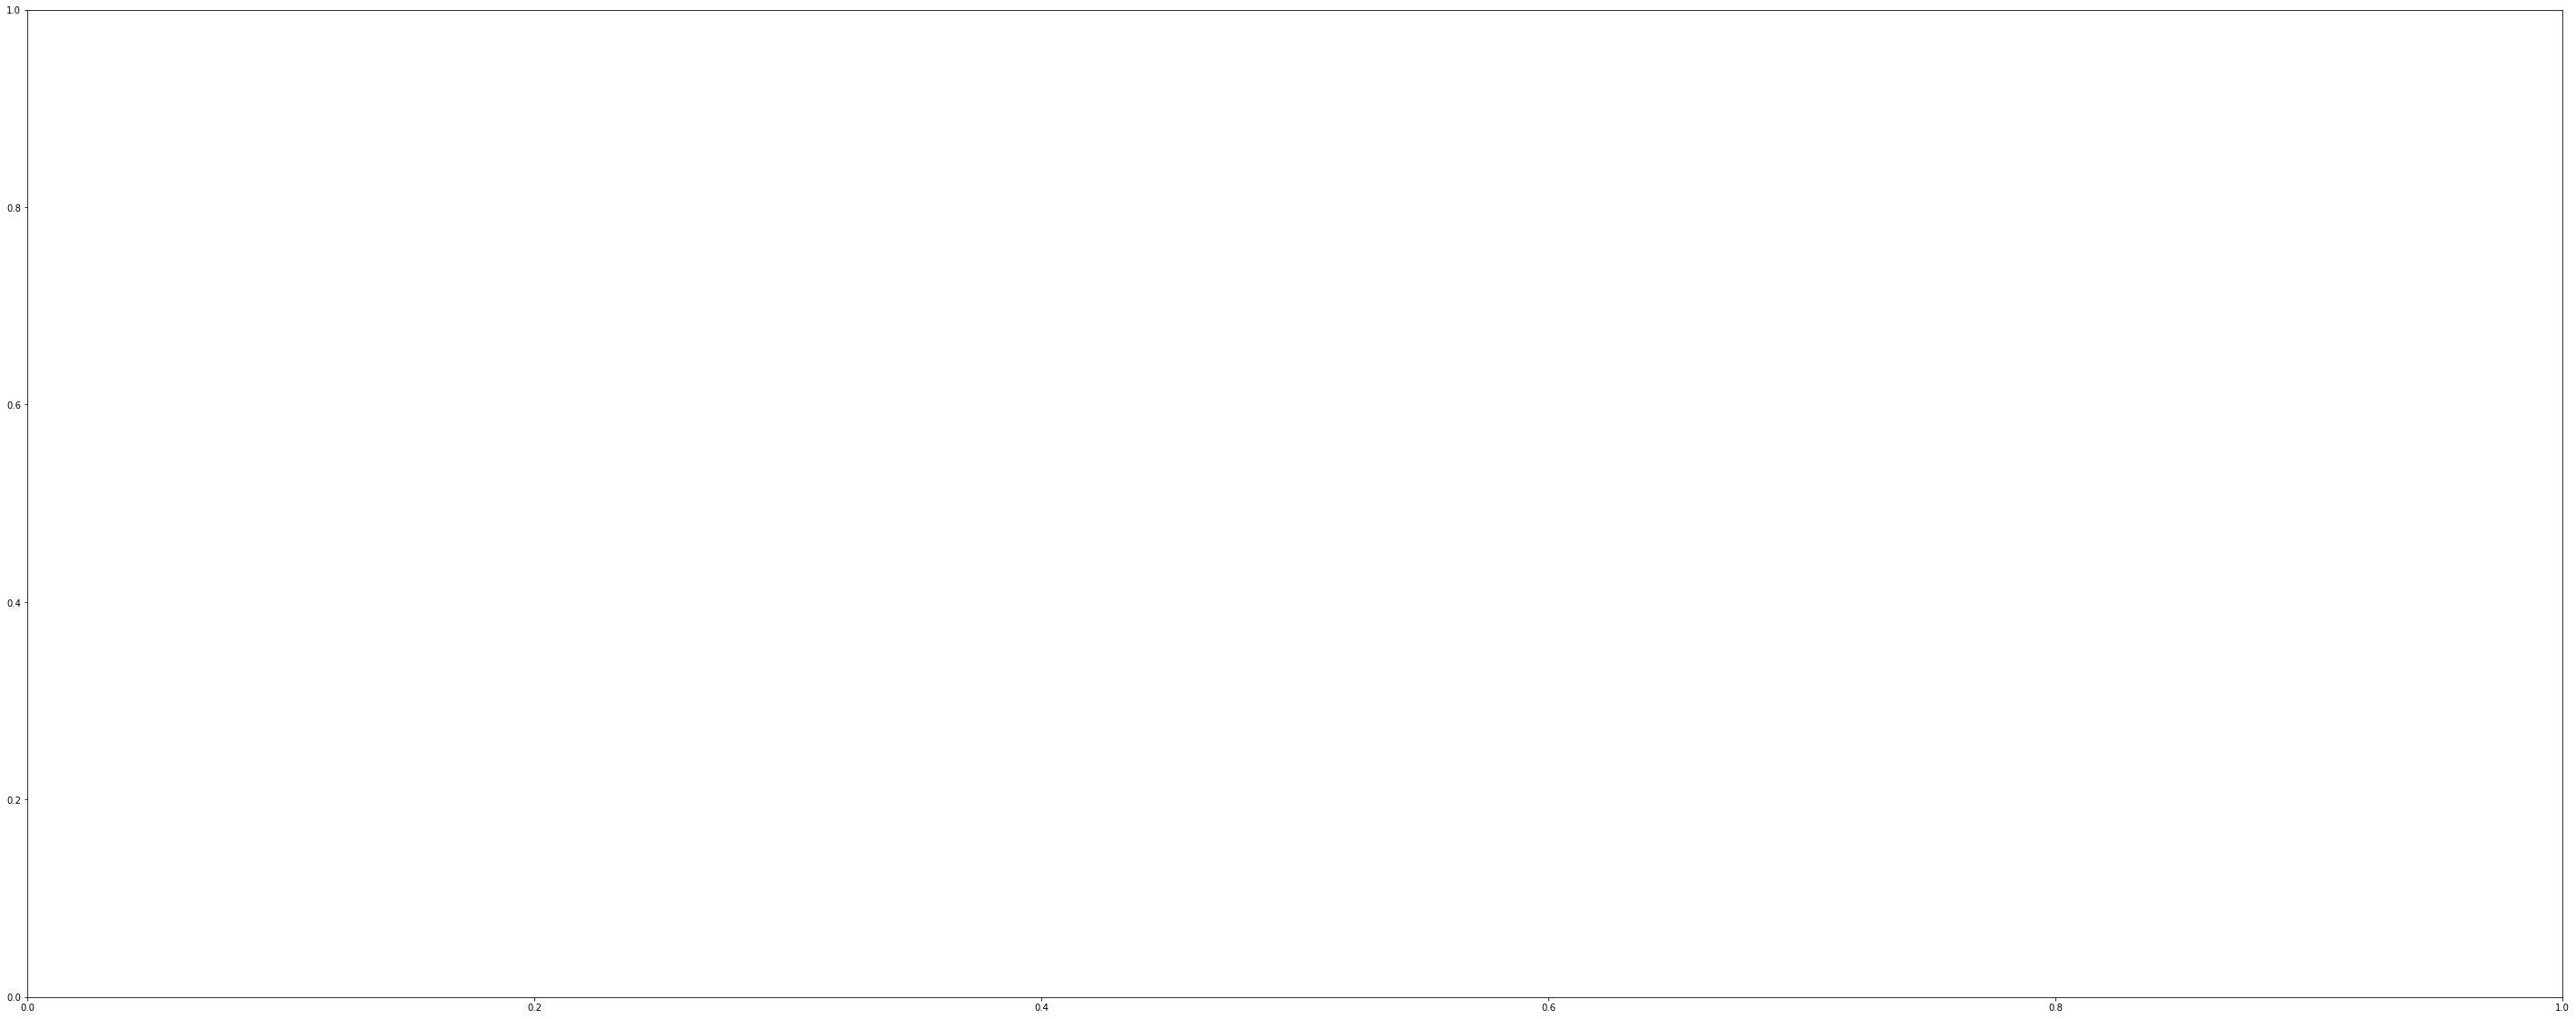

In [59]:
fig, ax = plt.subplots(figsize=(50,20))
plt.bar(df_avg_travel_times.count(), df_avg_travel_times['MeanTravelTimeSeconds'].sort_values(ascending=True))

plt.xticks(fontsize=30, rotation=45)
plt.yticks(fontsize=30)
plt.xlabel("Rounded Delivery Time", fontsize=40)
plt.ylabel("Count of Delivery Time", fontsize=40)
ax.xaxis.set_major_locator(plt.MaxNLocator(40))
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
plt.xlim(0, 3000)

In [5]:
avg_travel_times.describe()

count    1548.000000
mean     1839.712639
std       141.171870
min       957.246377
25%      1759.249249
50%      1852.368507
75%      1931.371392
max      2363.019006
Name: MeanTravelTimeSeconds, dtype: float64

c:\users\i539797\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


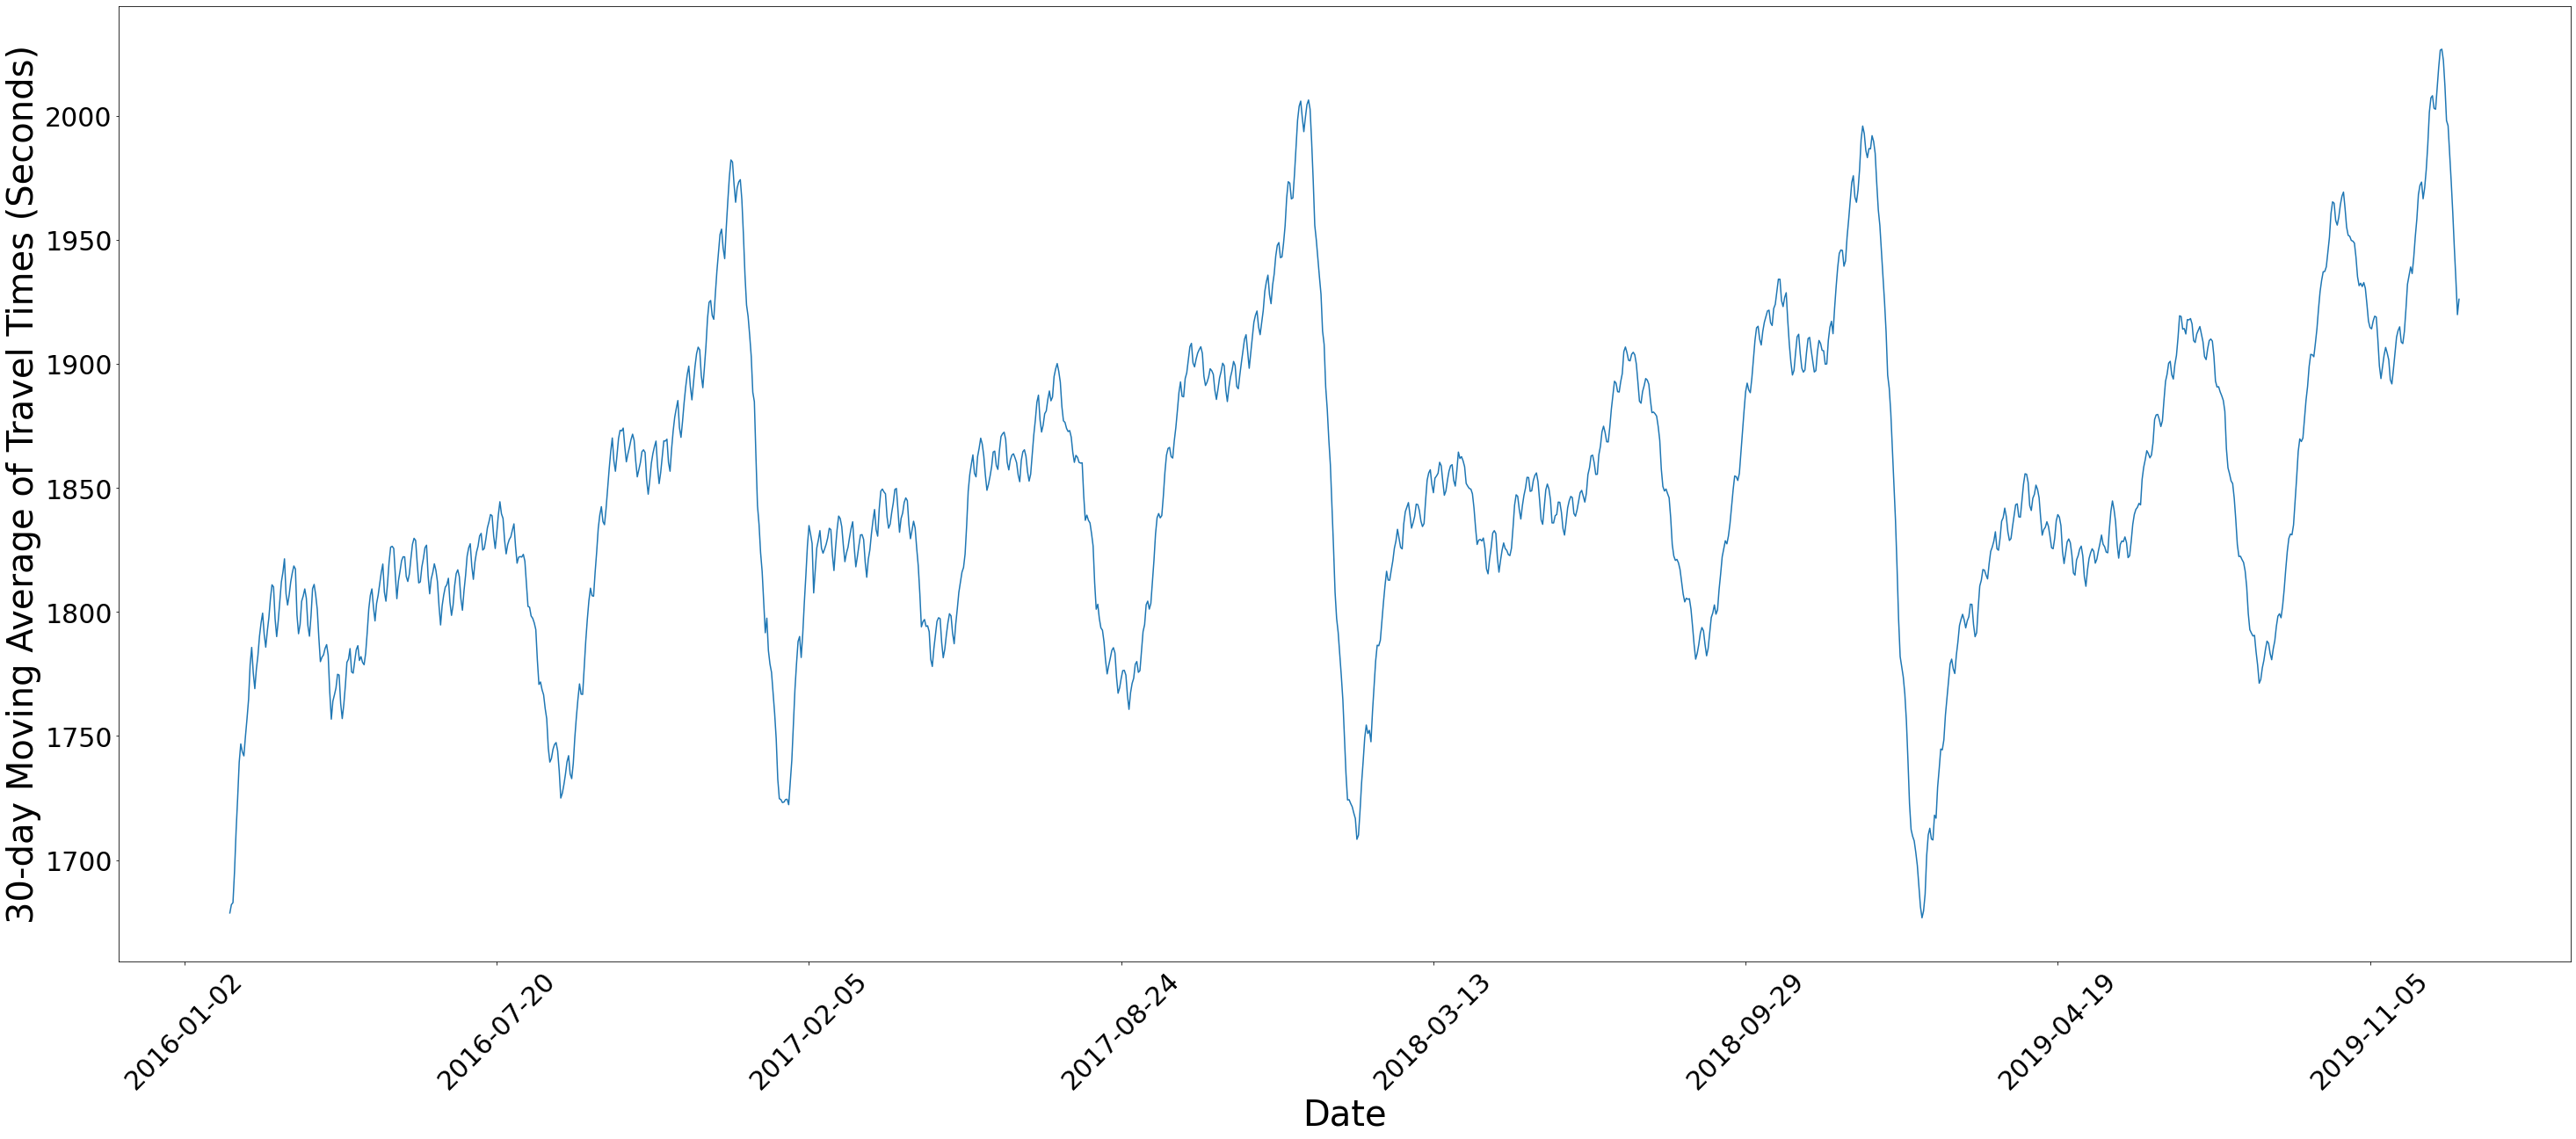

In [6]:
plt.figure(figsize=(50,20))
rolling_mean = avg_travel_times[:-90].rolling(window=30).mean().plot()
plt.xticks(fontsize=30, rotation=45)
plt.yticks(fontsize=30)
plt.xlabel("Date", fontsize=40)
plt.ylabel("30-day Moving Average of Travel Times (Seconds)", fontsize=40)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.yaxis.set_major_locator(plt.MaxNLocator(7))

c:\users\i539797\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

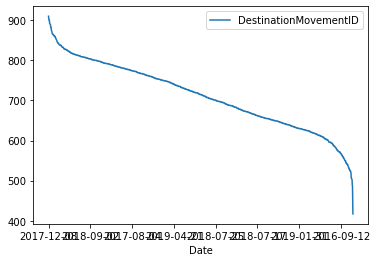

In [7]:
# Number of colored zones at a given date
dataframe = pd.DataFrame(df.groupby('Date')['DestinationMovementID'].nunique()[:-90])
dataframe.sort_values('DestinationMovementID', ascending=False).plot()

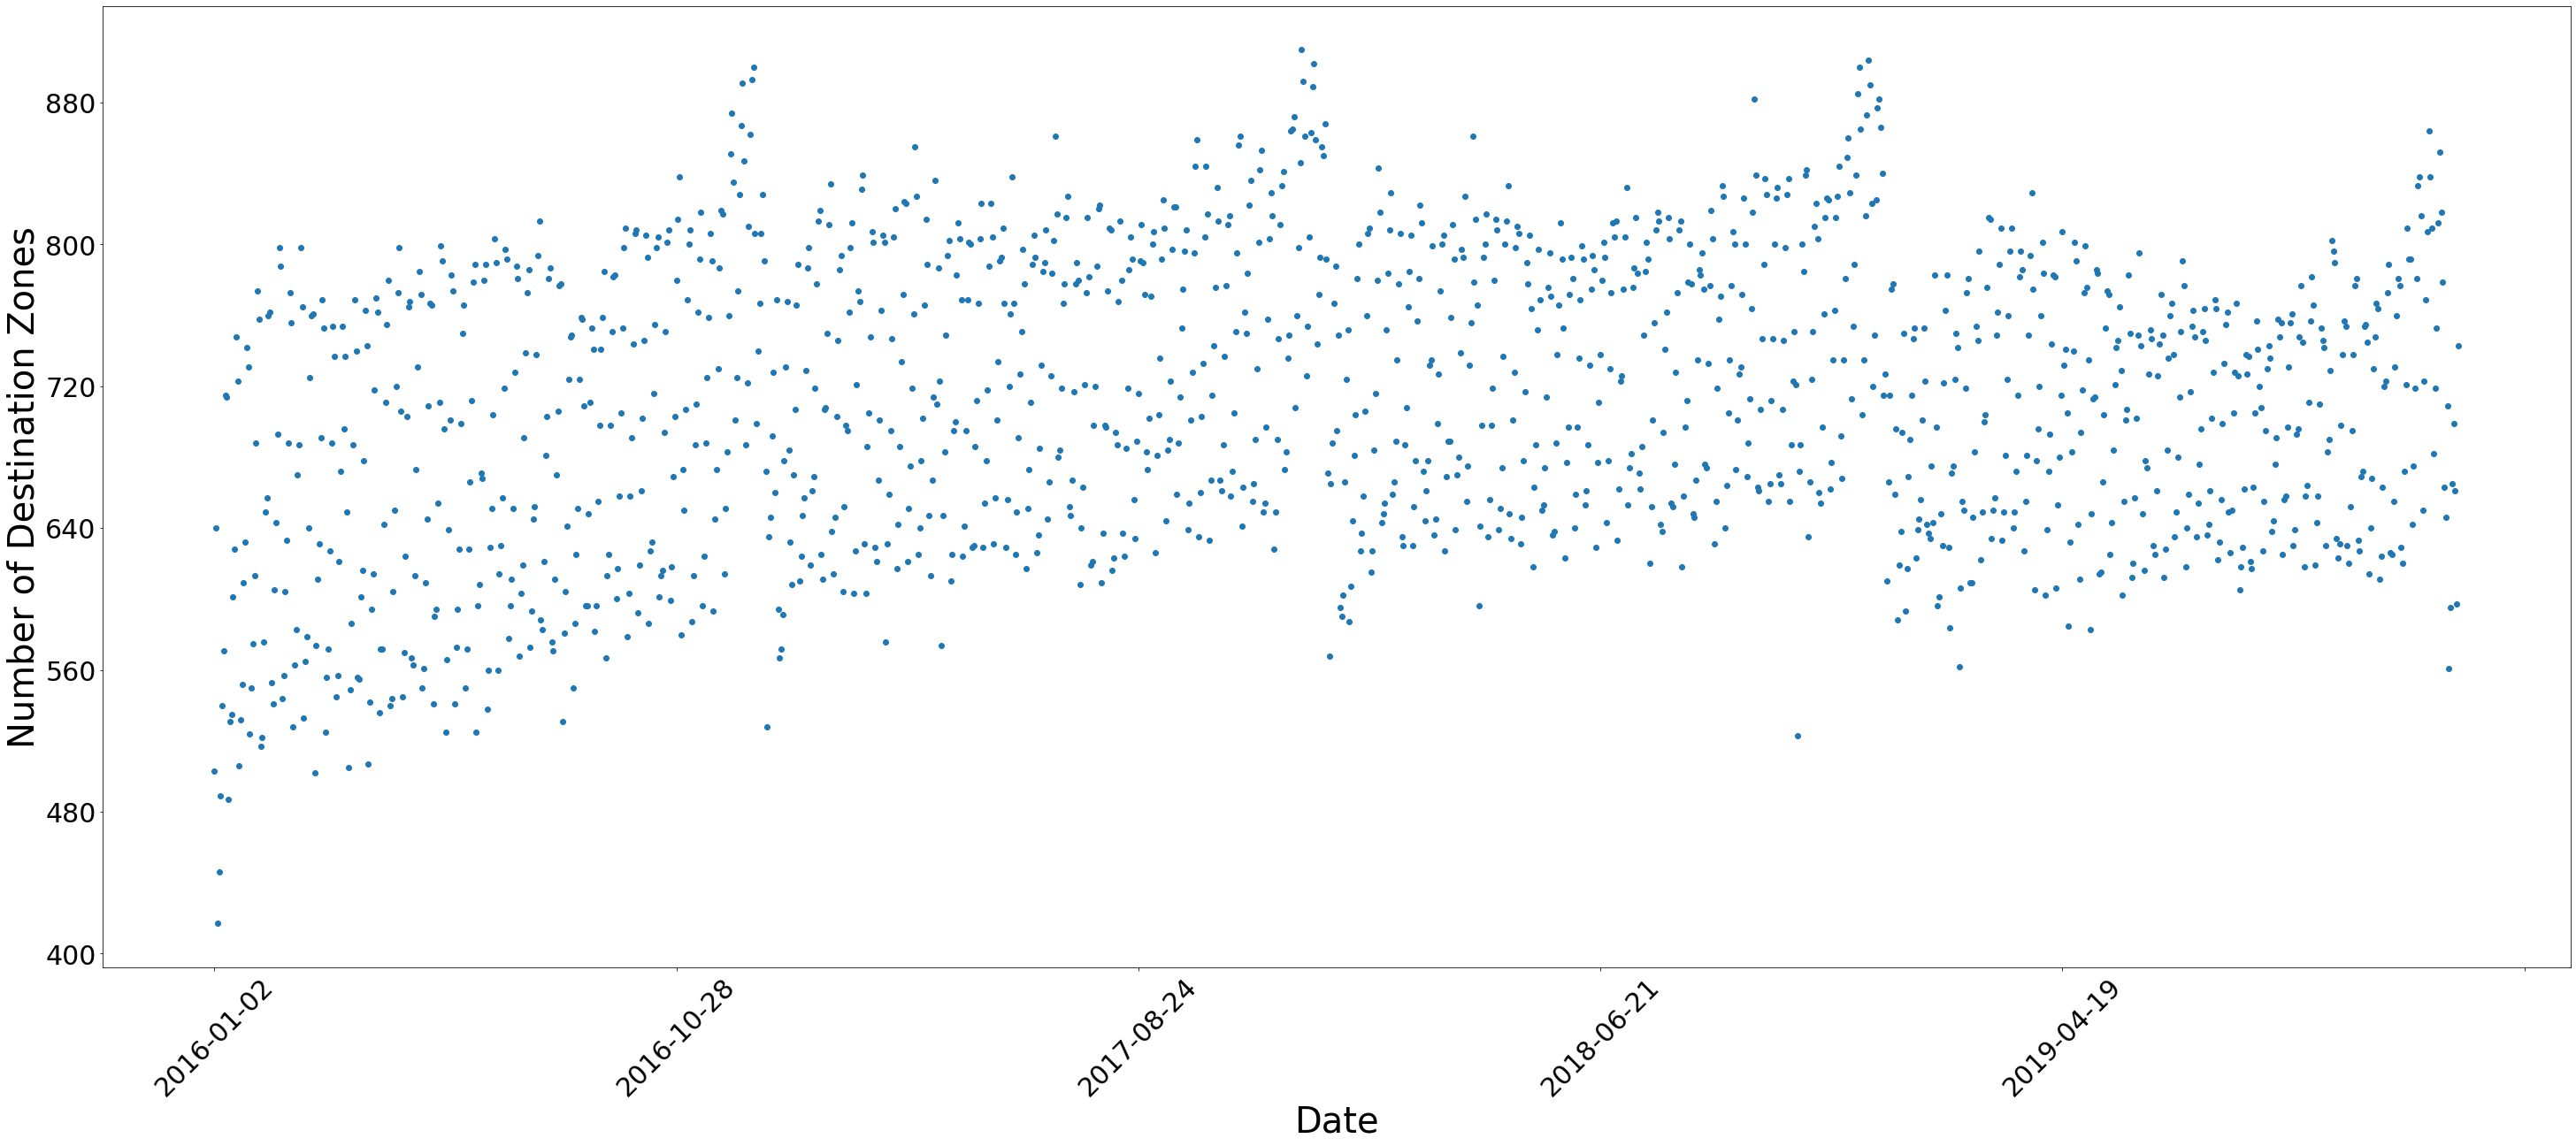

In [8]:
# Plotting the amount of zones to which there have been trips on a given day throughout time
daily_trip_count = df.groupby('Date')['MeanTravelTimeSeconds'].count()[:-90]

fig, ax = plt.subplots(figsize=(50,20))
plt.scatter(df['Date'].unique()[:-90], daily_trip_count)

# We change the fontsize of minor ticks label 
plt.xticks(fontsize=30, rotation=45)
plt.yticks(fontsize=30)
plt.xlabel("Date", fontsize=40)
plt.ylabel("Number of Destination Zones", fontsize=40)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.yaxis.set_major_locator(plt.MaxNLocator(7))

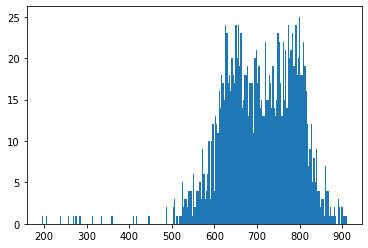

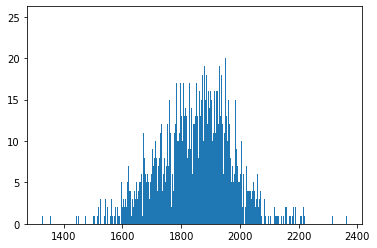

In [60]:
# Plot histogram of number of colored zones
width = 3 # Width of bins (bars)
n = math.ceil((df['Date'].value_counts().max() - df['Date'].value_counts().min())/width) # Define appropriate number of bins
plt.hist(df['Date'].value_counts(), n)
plt.show()

# Plot histogram of average travel times
n = math.ceil((avg_travel_times.max() - avg_travel_times.min())/width) # Define appropriate number of bins
plt.hist(avg_travel_times, n)
plt.show()

[Text(0.5, 0, 'Average Travel Times')]

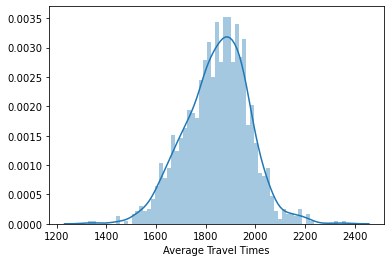

In [87]:
# fig, ax = plt.subplots(figsize=(50, 20))

ax = sns.distplot(avg_travel_times, bins=65)
ax.set(xlabel='Average Travel Times')

c:\users\i539797\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


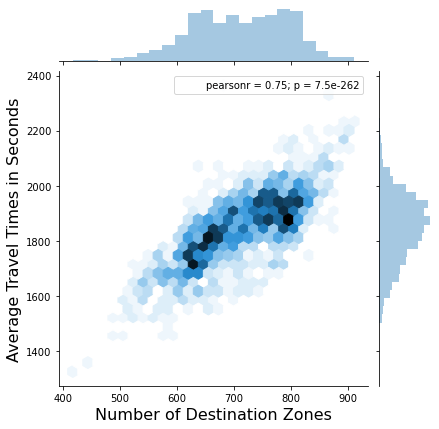

In [86]:
# Joint plot of num,ber of areas to which there were recorded trips and average travel times
# sns.jointplot(x=daily_trip_count, y=avg_travel_times, kind='reg')
# sns.jointplot(x=daily_trip_count, y=avg_travel_times, kind='kde')
ax = sns.jointplot(x=daily_trip_count, y=avg_travel_times, kind='hex')
ax.set_axis_labels('Number of Destination Zones', 'Average Travel Times in Seconds', fontsize=16)
ax.annotate(pearsonr)

In [14]:
df['MeanTravelTimeSeconds'].mean()

1853.683093625976

In [15]:
df.set_index(['Date'], inplace=True)
df.head()

,NumericIndex,OriginMovementID,DestinationMovementID,MeanTravelTimeSeconds,RangeLowerBoundTravelTimeSeconds,RangeUpperBoundTravelTimeSeconds,DayOfWeek
Date,,,,,,,
2016-01-02,1092025,573,982,970,709,1325,Saturday
2016-01-02,1091680,573,318,1201,966,1492,Saturday
2016-01-02,1091681,573,319,1525,1141,2037,Saturday
2016-01-02,1091682,573,320,1116,824,1511,Saturday
2016-01-02,1091683,573,321,1075,853,1354,Saturday


<AxesSubplot:xlabel='Date'>

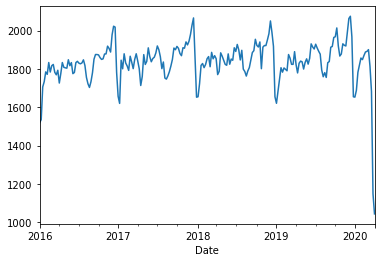

In [16]:
# Transform the index into a datetime object
df.index = pd.to_datetime(df.index)
type(df.index)

# Plot weekly average travel times
avg_travel_times = df.groupby('Date')['MeanTravelTimeSeconds'].mean()
weekly_avg = avg_travel_times.resample('W').mean()
weekly_avg.plot()

# fig, ax = plt.subplots(figsize=(50,20))
# plt.scatter(df['Date'].unique(), daily_trip_count)

# # We change the fontsize of minor ticks label 
# plt.xticks(fontsize=30, rotation=45)
# plt.yticks(fontsize=30)
# plt.xlabel("Date", fontsize=40)
# plt.ylabel("Daily Number of Recorded Trips", fontsize=40)
# ax.xaxis.set_major_locator(plt.MaxNLocator(6))
# ax.yaxis.set_major_locator(plt.MaxNLocator(7))

In [15]:
df.stack()

Date                                        
2016-01-02  NumericIndex                        2151919
            OriginMovementID                          9
            DestinationMovementID                  5118
            MeanTravelTimeSeconds                  1960
            RangeLowerBoundTravelTimeSeconds       1646
                                                 ...   
2020-03-31  DestinationMovementID                   243
            MeanTravelTimeSeconds                   809
            RangeLowerBoundTravelTimeSeconds        380
            RangeUpperBoundTravelTimeSeconds       1719
            DayOfWeek                           Tuesday
Length: 15063440, dtype: object